# Построение и визуализация зависимости спроса от цены
![Картинка][logo]

[logo]: result.png "Наш ответ"
## по результатам продаж в период с 10 мая 2021 года по 9 июля 2021 года, товара с артикулом 26948596

__Исходные данные__
    
    Файл формата xlsx: "source/valiant_26948596.xlsx"
    Файл формата xlsx: "source/karna_11076110.xlsx"
    Файл формата xlsx: "source/shtora_10226843_valiant.xlsx"
    Файл формата xlsx: "source/shtora_valiant_2812202.xlsx"
    
__Задание__

    По данным сервиса MPStats.io:
![Картинка][data]

[data]: screen_title.png "Данные"
- <https://mpstats.io/> экспорт файла с данными;
- выборка, очистка и форматирование данных;
- построение и визуализация графика зависимости продаж от цен на продукцию.

1. Выборка объектов:
    - по количеству и сумме продаж.
2. Расчёт:
    - определение цены проданного товара.
3. Объединение и подсчёт результатов для построения графика
4. Построение и визуализация графика.

__Используемый стек технологий__:

    LibreOffice,
    Python+librarys:
    pandas,
    numpy,
    matplotlib,
    scipy,
    openxsl,
    ...другие сторонние библиотеки.

# РЕШЕНИЕ:

In [59]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# предварительные настройки внешнего вида графиков
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'

In [60]:
# получаем данные в формате типа данных pandas.DataFrame из файла формата .xlsx
dataset = pd.read_excel(r'source/valiant_26948596.xlsx') # арт. 26948596

# дополнительные наименования товаров для тестов
dataset_1 = pd.read_excel(r'source/karna_11076110.xlsx') # арт. 11076110
dataset_2 = pd.read_excel(r'source/shtora_10226843_valiant.xlsx') # арт. 10226843
dataset_3 = pd.read_excel(r'source/shtora_valiant_2812202.xlsx') # арт. 2812202

# просмотрим полученный результат
dataset

,Дата,Продажи,Остаток,Цена,Со скидкой и промо,Скидка,Цена со скидкой,Промокод,СПП,Цена с СПП,Сумма продаж,Комментариев,Рейтинг,Остатки за сутки
0,2021-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-08,2,236.0,1240.0,634.0,36.0,793.0,20.0,5.0,603.0,1268,46.0,5.0,2021-07-08
2,2021-07-07,6,235.0,1240.0,535.0,46.0,669.0,20.0,5.0,508.0,3210,43.0,5.0,2021-07-07
3,2021-07-06,20,241.0,1240.0,535.0,46.0,669.0,20.0,5.0,508.0,10700,42.0,5.0,2021-07-06
4,2021-07-05,15,232.0,1240.0,535.0,46.0,669.0,20.0,5.0,508.0,8025,42.0,5.0,2021-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Среднее (в день),3 шт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 903,30 ₽",NaN,NaN,Среднее (в день)
63,Дней с наличием,58 дней,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Дней с наличием
64,Среднее при наличии,3 шт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 893,00 ₽",NaN,NaN,Среднее при наличии
65,Потенциал,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"118 136,00 ₽",NaN,NaN,Потенциал


In [61]:
# удаляем недостающие значения, применяем метод сортировки sort_values() по дате 
dataset = dataset.dropna().sort_values(by='Дата')

# проверяем последние 10 результатов 
dataset.tail(10)

,Дата,Продажи,Остаток,Цена,Со скидкой и промо,Скидка,Цена со скидкой,Промокод,СПП,Цена с СПП,Сумма продаж,Комментариев,Рейтинг,Остатки за сутки
10,2021-06-29,5,178.0,1240.0,535.0,46.0,669.0,20.0,5.0,508.0,2675,34.0,5.0,2021-06-29
9,2021-06-30,6,172.0,1240.0,535.0,46.0,669.0,20.0,5.0,508.0,3210,35.0,5.0,2021-06-30
8,2021-07-01,4,168.0,1240.0,535.0,46.0,669.0,20.0,5.0,508.0,2140,37.0,5.0,2021-07-01
7,2021-07-02,3,165.0,1240.0,535.0,46.0,669.0,20.0,5.0,508.0,1605,38.0,5.0,2021-07-02
6,2021-07-03,0,255.0,1240.0,535.0,46.0,669.0,20.0,5.0,508.0,0,38.0,5.0,2021-07-03
5,2021-07-04,9,246.0,1240.0,535.0,46.0,669.0,20.0,5.0,508.0,4815,39.0,5.0,2021-07-04
4,2021-07-05,15,232.0,1240.0,535.0,46.0,669.0,20.0,5.0,508.0,8025,42.0,5.0,2021-07-05
3,2021-07-06,20,241.0,1240.0,535.0,46.0,669.0,20.0,5.0,508.0,10700,42.0,5.0,2021-07-06
2,2021-07-07,6,235.0,1240.0,535.0,46.0,669.0,20.0,5.0,508.0,3210,43.0,5.0,2021-07-07
1,2021-07-08,2,236.0,1240.0,634.0,36.0,793.0,20.0,5.0,603.0,1268,46.0,5.0,2021-07-08


In [62]:
# просмотрим наименования столбцов
col = dataset.columns
for i in col:
    print(i)

Дата
Продажи
Остаток
Цена
Со скидкой и промо
Скидка
Цена со скидкой
Промокод
СПП
Цена с СПП
Сумма продаж
Комментариев
Рейтинг
Остатки за сутки


In [63]:
# оставим только необходимые
cols = ['Дата','Остаток', 'Цена', 'Скидка', 'Цена со скидкой', 'Промокод', 'СПП', 'Цена с СПП', 'Комментариев', 'Рейтинг', 
'Остатки за сутки']
dataset = dataset.drop(cols, axis=1)
dataset

,Продажи,Со скидкой и промо,Сумма продаж
60,0,694.0,0
59,0,694.0,0
58,0,694.0,0
57,0,694.0,0
56,0,694.0,0
55,0,694.0,0
54,0,694.0,0
53,1,694.0,694
52,0,694.0,0
51,2,694.0,1388


In [64]:
# определяем цену товара при продаже
# по данным предварительного просмотра данных,
# все продажи были осуществлены по цене со скидкой и промо,
# дополнительная информация по ценам продаж отсутствует 
def cost(row):
    """
    Функция определения цены товара при продаже
    """
    try:
        return row['Сумма продаж']/row['Продажи']
    except ZeroDivisionError:
        return row['Со скидкой и промо']

In [65]:
# применяем функцию подсчёта
dataset['Цена'] = dataset.apply(cost, axis=1)
dataset

,Продажи,Со скидкой и промо,Сумма продаж,Цена
60,0,694.0,0,694.0
59,0,694.0,0,694.0
58,0,694.0,0,694.0
57,0,694.0,0,694.0
56,0,694.0,0,694.0
55,0,694.0,0,694.0
54,0,694.0,0,694.0
53,1,694.0,694,694.0
52,0,694.0,0,694.0
51,2,694.0,1388,694.0


In [66]:
# удаляем ненужную информацию
dataset = dataset.drop(['Со скидкой и промо','Сумма продаж'], axis=1)
dataset

,Продажи,Цена
60,0,694.0
59,0,694.0
58,0,694.0
57,0,694.0
56,0,694.0
55,0,694.0
54,0,694.0
53,1,694.0
52,0,694.0
51,2,694.0


In [67]:
# данные для построения графика
dataset = dataset.groupby(['Цена'])['Продажи'].sum()
dataset

Цена
496.0     11
505.0      0
535.0    129
565.0      0
585.0     18
634.0     21
659.0      4
694.0      7
734.0      6
753.0      3
783.0      0
863.0      2
Name: Продажи, dtype: object

<AxesSubplot:title={'center':'Зависимость спроса от цены (арт. 26948596)'}, xlabel='Цена'>

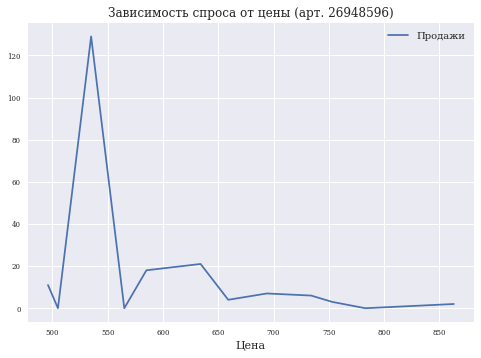

In [68]:
# график
dataset.plot(title = 'Зависимость спроса от цены (арт. 26948596)', grid=True, fontsize=7, legend=True)

<AxesSubplot:title={'center':'Зависимость спроса от цены (арт. 11076110 KARNA)'}, xlabel='Цена'>

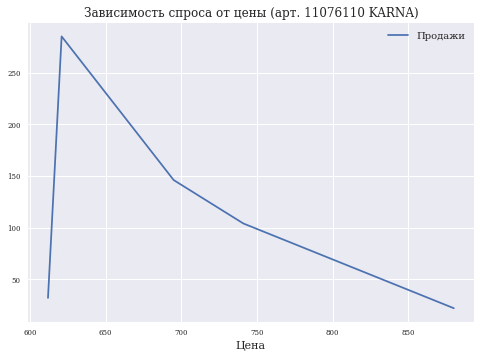

In [69]:
# просмотрим результаты по другим наименованиям и артикулам продукции

# удаляем недостающие значения и применяем метод сортировки sort_values() по дате 
dataset_1 = dataset_1.dropna().sort_values(by='Дата')
# оставим только необходимые
cols = ['Дата','Остаток', 'Цена', 'Скидка', 'Цена со скидкой', 'Промокод', 'СПП', 'Цена с СПП', 'Комментариев', 'Рейтинг', 
'Остатки за сутки']
dataset_1 = dataset_1.drop(cols, axis=1)
# определяем цену товара при продаже
# по данным предварительного просмотра данных,
# все продажи были осуществлены по цене со скидкой и промо,
# дополнительная информация по ценам продаж отсутствует 
def cost(row):
    """
    Функция определения цены товара при продаже
    """
    try:
        return row['Сумма продаж']/row['Продажи']
    except ZeroDivisionError:
        return row['Со скидкой и промо']
    
# применяем функцию подсчёта
dataset_1['Цена'] = dataset_1.apply(cost, axis=1)
# удаляем ненужную информацию
dataset_1 = dataset_1.drop(['Со скидкой и промо','Сумма продаж'], axis=1)
# получаем данные для построения графика
dataset_1 = dataset_1.groupby(['Цена'])['Продажи'].sum()
# график
dataset_1.plot(title = 'Зависимость спроса от цены (арт. 11076110 KARNA)', grid=True, fontsize=7, legend=True)

<AxesSubplot:title={'center':'Зависимость спроса от цены (арт. 10226843)'}, xlabel='Цена'>

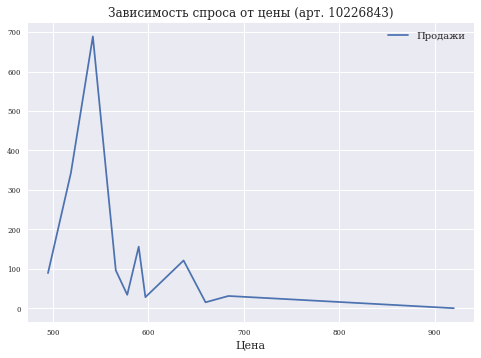

In [70]:
# удаляем недостающие значения и применяем метод сортировки sort_values() по дате 
dataset_2 = dataset_2.dropna().sort_values(by='Дата')
# оставим только необходимые
cols = ['Дата','Остаток', 'Цена', 'Скидка', 'Цена со скидкой', 'Промокод', 'СПП', 'Цена с СПП', 'Комментариев', 'Рейтинг', 
'Остатки за сутки']
dataset_2 = dataset_2.drop(cols, axis=1)
# определяем цену товара при продаже
# по данным предварительного просмотра данных,
# все продажи были осуществлены по цене со скидкой и промо,
# дополнительная информация по ценам продаж отсутствует 
def cost(row):
    """
    Функция определения цены товара при продаже
    """
    try:
        return row['Сумма продаж']/row['Продажи']
    except ZeroDivisionError:
        return row['Со скидкой и промо']
    
# применяем функцию подсчёта
dataset_2['Цена'] = dataset_2.apply(cost, axis=1)
# удаляем ненужную информацию
dataset_2 = dataset_2.drop(['Со скидкой и промо','Сумма продаж'], axis=1)
# получаем данные для построения графика
dataset_2 = dataset_2.groupby(['Цена'])['Продажи'].sum()
# график
dataset_2.plot(title = 'Зависимость спроса от цены (арт. 10226843)', grid=True, fontsize=7, legend=True)

<AxesSubplot:title={'center':'Зависимость спроса от цены (арт. 2812202)'}, xlabel='Цена'>

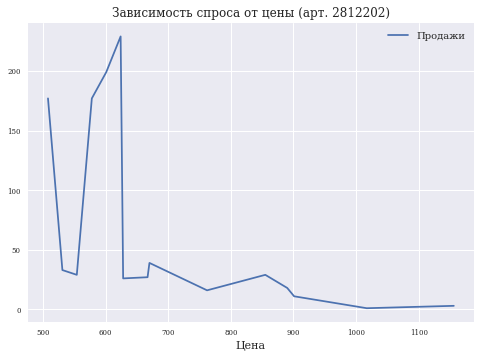

In [71]:
# удаляем недостающие значения и применяем метод сортировки sort_values() по дате 
dataset_3 = dataset_3.dropna().sort_values(by='Дата')
# оставим только необходимые
cols = ['Дата','Остаток', 'Цена', 'Скидка', 'Цена со скидкой', 'Промокод', 'СПП', 'Цена с СПП', 'Комментариев', 'Рейтинг', 
'Остатки за сутки']
dataset_3 = dataset_3.drop(cols, axis=1)
# определяем цену товара при продаже
# по данным предварительного просмотра данных,
# все продажи были осуществлены по цене со скидкой и промо,
# дополнительная информация по ценам продаж отсутствует 
def cost(row):
    """
    Функция определения цены товара при продаже
    """
    try:
        return row['Сумма продаж']/row['Продажи']
    except ZeroDivisionError:
        return row['Со скидкой и промо']
    
# применяем функцию подсчёта
dataset_3['Цена'] = dataset_3.apply(cost, axis=1)
# удаляем ненужную информацию
dataset_3 = dataset_3.drop(['Со скидкой и промо','Сумма продаж'], axis=1)
# получаем данные для построения графика
dataset_3 = dataset_3.groupby(['Цена'])['Продажи'].sum()
# график
dataset_3.plot(title = 'Зависимость спроса от цены (арт. 2812202)', grid=True, fontsize=7, legend=True)